In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

### Description
Dataset **data/Diemthi_thpt_quocgia_2016.xlsx** contains all scores for the high school graduate in 2016. However, all scores in column "DIEM_THI", we need to extract data this column into seprate column, each column is the subject 

In [3]:
dataset = pd.read_excel("data/Diemthi_thpt_quocgia_2016.xlsx")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34826 entries, 0 to 34825
Data columns (total 6 columns):
SOBAODANH     34826 non-null object
HO_TEN        34826 non-null object
NGAY_SINH     34826 non-null object
TEN_CUMTHI    34826 non-null object
GIOI_TINH     34826 non-null object
DIEM_THI      34826 non-null object
dtypes: object(6)
memory usage: 1.6+ MB


In [4]:
dataset.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...


In [5]:
dataset.DIEM_THI.values

array(['Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00',
       'Toán:   5.50   Ngữ văn:   5.25   Địa lí:   5.50   Tiếng Anh:   3.68',
       'Toán:   4.50   Ngữ văn:   5.50   Địa lí:   3.75   Tiếng Anh:   2.25',
       ...,
       'Toán:   4.00   Ngữ văn:   5.50   Vật lí:   5.60   Tiếng Anh:   3.60',
       'Toán:   5.75   Ngữ văn:   6.00   Vật lí:   7.40   Hóa học:   4.80   Tiếng Anh:   2.88',
       'Toán:   2.50   Ngữ văn:   4.25   Vật lí:   4.20   Hóa học:   4.40   Sinh học:   4.40   Tiếng Anh:   3.00'],
      dtype=object)

In [6]:
diemThiList = dataset.DIEM_THI.str.split(r"\s\s").values

In [7]:
diemThiList

array([list(['Toán:', ' 2.00', ' Ngữ văn:', ' 5.50', ' Lịch sử:', ' 3.00', ' Địa lí:', ' 5.00']),
       list(['Toán:', ' 5.50', ' Ngữ văn:', ' 5.25', ' Địa lí:', ' 5.50', ' Tiếng Anh:', ' 3.68']),
       list(['Toán:', ' 4.50', ' Ngữ văn:', ' 5.50', ' Địa lí:', ' 3.75', ' Tiếng Anh:', ' 2.25']),
       ...,
       list(['Toán:', ' 4.00', ' Ngữ văn:', ' 5.50', ' Vật lí:', ' 5.60', ' Tiếng Anh:', ' 3.60']),
       list(['Toán:', ' 5.75', ' Ngữ văn:', ' 6.00', ' Vật lí:', ' 7.40', ' Hóa học:', ' 4.80', ' Tiếng Anh:', ' 2.88']),
       list(['Toán:', ' 2.50', ' Ngữ văn:', ' 4.25', ' Vật lí:', ' 4.20', ' Hóa học:', ' 4.40', ' Sinh học:', ' 4.40', ' Tiếng Anh:', ' 3.00'])],
      dtype=object)

In [8]:
zero = np.zeros((dataset.shape[0], 8))
zero[:] = np.NaN

In [9]:
monHoc = ["Toán", "Ngữ văn", "Địa lí", "Tiếng Anh", "Sinh học", "Vật lí", "Hóa học", "Lịch sử"]
diemThi = pd.DataFrame(zero, columns=monHoc)

In [10]:
diemThi.head()

,Toán,Ngữ văn,Địa lí,Tiếng Anh,Sinh học,Vật lí,Hóa học,Lịch sử
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import re
for i in range(len(diemThiList)):
    row = diemThiList[i]
    for j in range(0,len(row), 2):
        mon = row[j][:-1].strip()
        diem = row[j + 1].strip()
        diemThi.loc[i][mon] = diem

In [12]:
diemThi.head()

,Toán,Ngữ văn,Địa lí,Tiếng Anh,Sinh học,Vật lí,Hóa học,Lịch sử
0,2.00,5.50,5.00,NaN,NaN,NaN,NaN,3.0
1,5.50,5.25,5.50,3.68,NaN,NaN,NaN,NaN
2,4.50,5.50,3.75,2.25,NaN,NaN,NaN,NaN
3,3.00,6.00,5.50,1.50,NaN,NaN,NaN,NaN
4,2.25,4.75,5.25,2.00,NaN,NaN,NaN,NaN


In [13]:
new_dataset = pd.concat([dataset, diemThi], axis = 1)

In [14]:
new_dataset.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI,Toán,Ngữ văn,Địa lí,Tiếng Anh,Sinh học,Vật lí,Hóa học,Lịch sử
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....,2.00,5.50,5.00,NaN,NaN,NaN,NaN,3.0
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...,5.50,5.25,5.50,3.68,NaN,NaN,NaN,NaN
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...,4.50,5.50,3.75,2.25,NaN,NaN,NaN,NaN
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...,3.00,6.00,5.50,1.50,NaN,NaN,NaN,NaN
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...,2.25,4.75,5.25,2.00,NaN,NaN,NaN,NaN


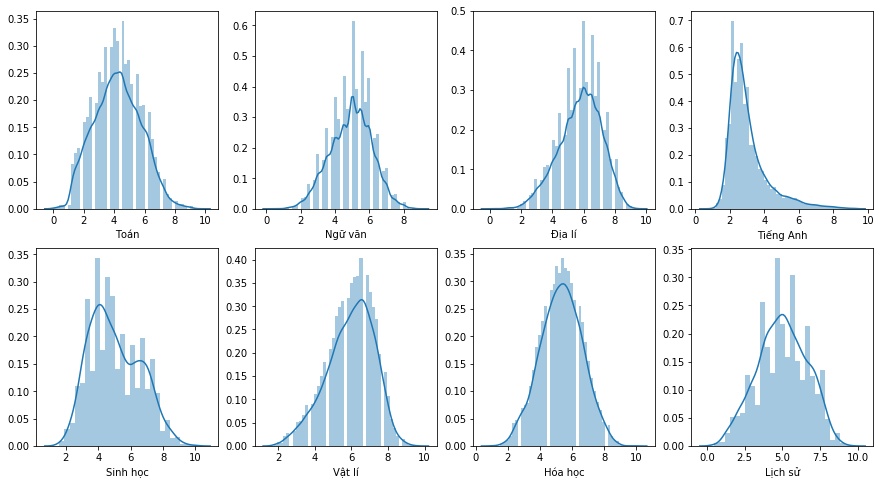

In [15]:
toan = new_dataset["Toán"]
toan = toan[toan.isnull() != True]

nguVan = new_dataset["Ngữ văn"]
nguVan = nguVan[nguVan.isnull() != True]

diaLi = new_dataset["Địa lí"]
diaLi = diaLi[diaLi.isnull() != True]

tiengAnh = new_dataset["Tiếng Anh"]
tiengAnh = tiengAnh[tiengAnh.isnull() != True]

sinhHoc = new_dataset["Sinh học"]
sinhHoc = sinhHoc[sinhHoc.isnull() != True]

vatLi = new_dataset["Vật lí"]
vatLi = vatLi[vatLi.isnull() != True]

hoaHoc = new_dataset["Hóa học"]
hoaHoc = hoaHoc[hoaHoc.isnull() != True]

lichSu = new_dataset["Lịch sử"]
lichSu = lichSu[lichSu.isnull() != True]

plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sb.distplot(toan)
plt.subplot(2,4,2)
sb.distplot(nguVan)
plt.subplot(2,4,3)
sb.distplot(diaLi)
plt.subplot(2,4,4)
sb.distplot(tiengAnh)
plt.subplot(2,4,5)
sb.distplot(sinhHoc)
plt.subplot(2,4,6)
sb.distplot(vatLi)
plt.subplot(2,4,7)
sb.distplot(hoaHoc)
plt.subplot(2,4,8)
sb.distplot(lichSu)

plt.show()


In [16]:
new_dataset["Toán"].mode().values

array([4.5])

In [17]:
def distribution_analysis(data, subject):
    subjectCol = data[data[subject].isnull() != True][subject]
    
    subject_skew = subjectCol.skew()
    subject_kur = subjectCol.kurtosis()
    print('***', subject, '***')
    print(subject, "skew:", subject_skew)
    print(subject, "kur:", subject_kur)
    print(subject, "skew + kur:", (abs(subject_skew) + abs(subject_kur)))
    print(subject,"mean:", subjectCol.mean())
    print(subject,"median:", subjectCol.median())
    print(subject, "mode:", subjectCol.mode().values)
    print(subject, "range:", subjectCol.ptp())
    if (subject_skew > 0): 
        print(subject, "phân phối lệch phải")
    elif (subject_skew < 0):
        print(subject, "phân phối lệch trái")
    else:
        print(subject, "phân phối đối xứng")
        
    if (subject_kur > 0): 
        print(subject, "phân phối nhọn hơn pp chuẩn")
    elif (subject_kur < 0):
        print(subject, "phân phối thấp hơn pp chuẩn")
    else:
        print(subject, "phân phối chuẩn")
        
    print("\n")

In [18]:
pd.options.display.max_rows = 5000
for mh in monHoc:
    distribution_analysis(new_dataset, mh)

*** Toán ***
Toán skew: 0.12195708405667613
Toán kur: -0.4318761810212748
Toán skew + kur: 0.5538332650779509
Toán mean: 4.230152173913043
Toán median: 4.25
Toán mode: [4.5]
Toán range: 9.75
Toán phân phối lệch phải
Toán phân phối thấp hơn pp chuẩn


*** Ngữ văn ***
Ngữ văn skew: -0.15748699565565757
Ngữ văn kur: -0.19927037260923486
Ngữ văn skew + kur: 0.35675736826489246
Ngữ văn mean: 4.931521803269015
Ngữ văn median: 5.0
Ngữ văn mode: [5.]
Ngữ văn range: 8.75
Ngữ văn phân phối lệch trái
Ngữ văn phân phối thấp hơn pp chuẩn


*** Địa lí ***
Địa lí skew: -0.3829205392545493
Địa lí kur: -0.1199193910207943
Địa lí skew + kur: 0.5028399302753436
Địa lí mean: 5.7769608948626585
Địa lí median: 6.0
Địa lí mode: [6.]
Địa lí range: 9.5
Địa lí phân phối lệch trái
Địa lí phân phối thấp hơn pp chuẩn


*** Tiếng Anh ***
Tiếng Anh skew: 1.805736794717211
Tiếng Anh kur: 3.9806055738168338
Tiếng Anh skew + kur: 5.7863423685340445
Tiếng Anh mean: 3.0541400662251657
Tiếng Anh median: 2.75
Tiếng Anh mod

/home/dat-tran/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  del sys.path[0]


* Subjects **Ngữ văn, Lịch sử, Hóa học** have are nearly standard normal distribution. 
The other subjects are not normal distribution
* The percent of 95% of **"tiếng Anh"** is 5.54 are the lowest among subjects. In the other, the percent of 95% of 
"Vật Lý" is hightest among subjects.
* At percentt of 5%, the lowest score is 1.75 belong to **"Toán"** and the hightest score is 3.6 belong to "Vật lý". 
In summary, almost students have good result at "Vật lý", "Tiếng Anh" have bad result.  